In [ ]:
import pandas as pd
import numpy as np
import feed as f
from dapc import defs
import v20

import numpy as np
from scipy.signal import argrelextrema
import matplotlib.pyplot as plt

from datetime import datetime
print(datetime.now())

# Drill-down Entry simulation

In [241]:
# create context
ctx = v20.Context(hostname= 'api-fxpractice.oanda.com', token=defs.key)
ctx.set_header(key='Authorization', value =defs.key)
# streaming contenxt
ctxs=v20.Context(hostname='stream-fxpractice.oanda.com', token=defs.key)
ctxs.set_header(key='Authorization', value =defs.key)

In [ ]:
def apply_sign(row):
    return row[-8:].sum()

In [250]:
df=f.getPriceHistory('EUR_USD', 200, 'S30')

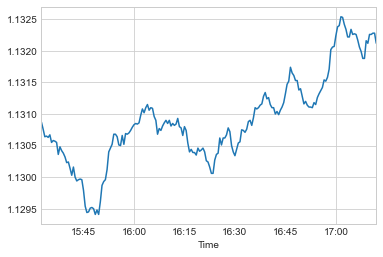

In [251]:
df.C.plot();

In [252]:
# find max, min index
local_max = argrelextrema(df.C.values, np.greater)[0]
local_min = argrelextrema(df.C.values, np.less)[0]

In [253]:
df=df.reset_index()

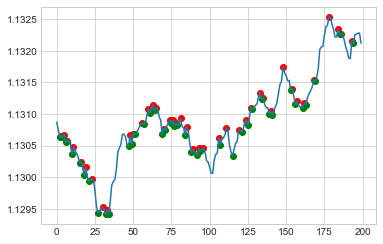

In [254]:
df.C.plot(grid=True)
plt.scatter(local_max, df.C.values[local_max], c='r', marker ='o');
plt.scatter(local_min, df.C.values[local_min], c='g', marker = 'o');

In [255]:
max_min = [*local_min, *local_max]
max_min.sort()
max_min
df.C[max_min]

2      1.13064
3      1.13065
4      1.13063
5      1.13067
6      1.13055
        ...   
184    1.13234
185    1.13226
186    1.13227
193    1.13216
194    1.13212
Name: C, Length: 81, dtype: float64

In [256]:
dat=df.C[max_min].copy()
patterns = defaultdict(list)
for i in range(5, len(max_min)):
    window = dat.iloc[i-5:i]
    a, b, c, d, e = window.iloc[0:5]
    if window.index[-1] - window.index[0] > 100:      
            continue 
#     print(a,b,c,d,e)
    if a>b and c>a and c>e and c>d and e>d:
        print('ime a H&S:',a,b,c,d,e)
        patterns['HS'].append((window))
patterns

ime a H&S: 1.13065 1.13063 1.13067 1.13055 1.13058
ime a H&S: 1.13108 1.13102 1.13115 1.13106 1.1311
ime a H&S: 1.13085 1.13082 1.13093 1.13066 1.1308
ime a H&S: 1.13062 1.13051 1.13078 1.13034 1.13075
ime a H&S: 1.1311 1.13108 1.13134 1.13124 1.13126
ime a H&S: 1.13104 1.13099 1.13174 1.13138 1.1314


defaultdict(list,
            {'HS': [3    1.13065
              4    1.13063
              5    1.13067
              6    1.13055
              7    1.13058
              Name: C, dtype: float64,
              60    1.13108
              61    1.13102
              63    1.13115
              64    1.13106
              65    1.13110
              Name: C, dtype: float64,
              78    1.13085
              79    1.13082
              81    1.13093
              84    1.13066
              85    1.13080
              Name: C, dtype: float64,
              106    1.13062
              107    1.13051
              111    1.13078
              115    1.13034
              119    1.13075
              Name: C, dtype: float64,
              127    1.13110
              128    1.13108
              133    1.13134
              134    1.13124
              135    1.13126
              Name: C, dtype: float64,
              140    1.13104
              141    1.13099
              148 

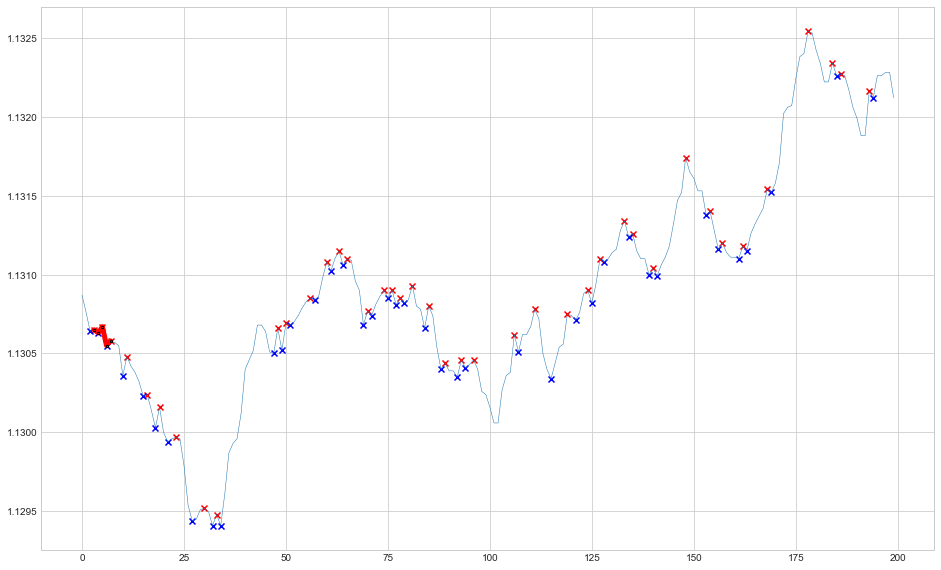

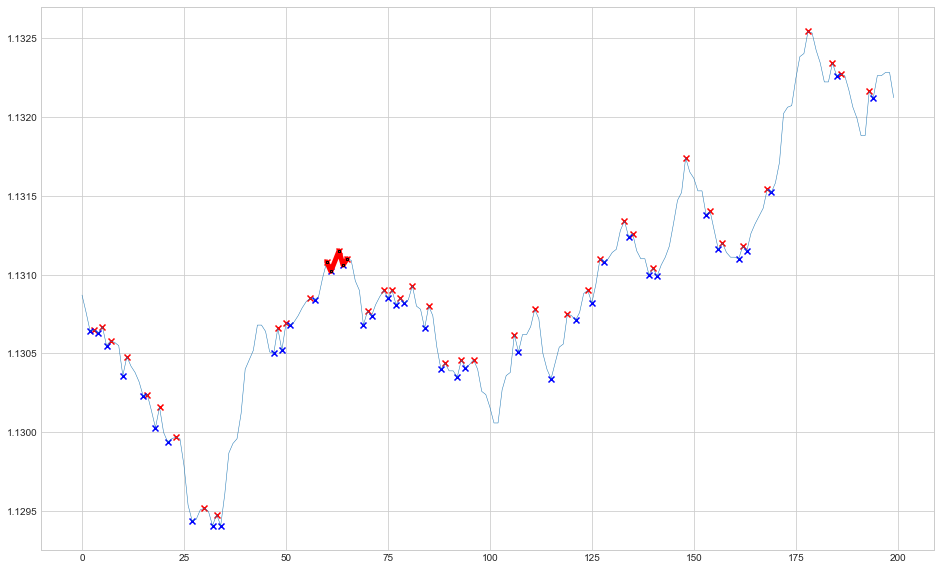

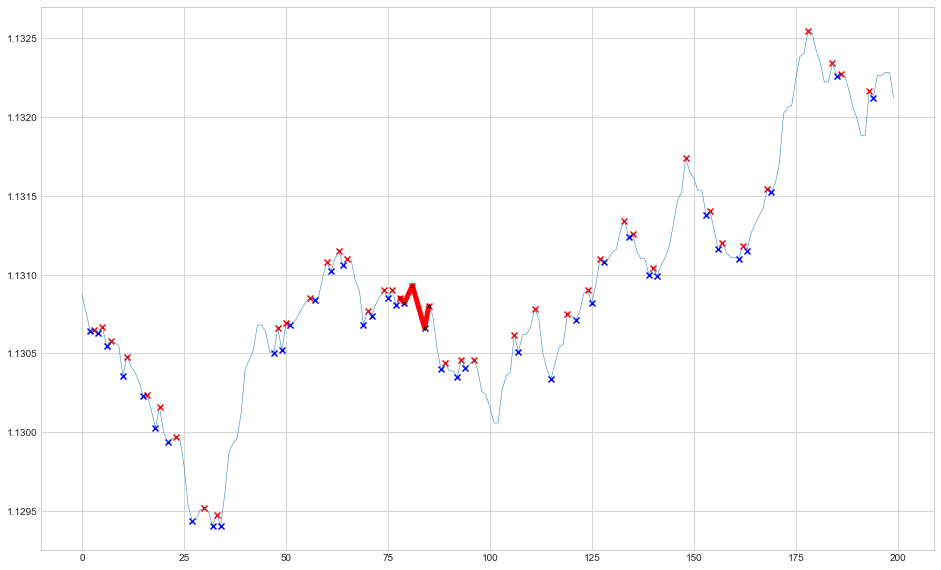

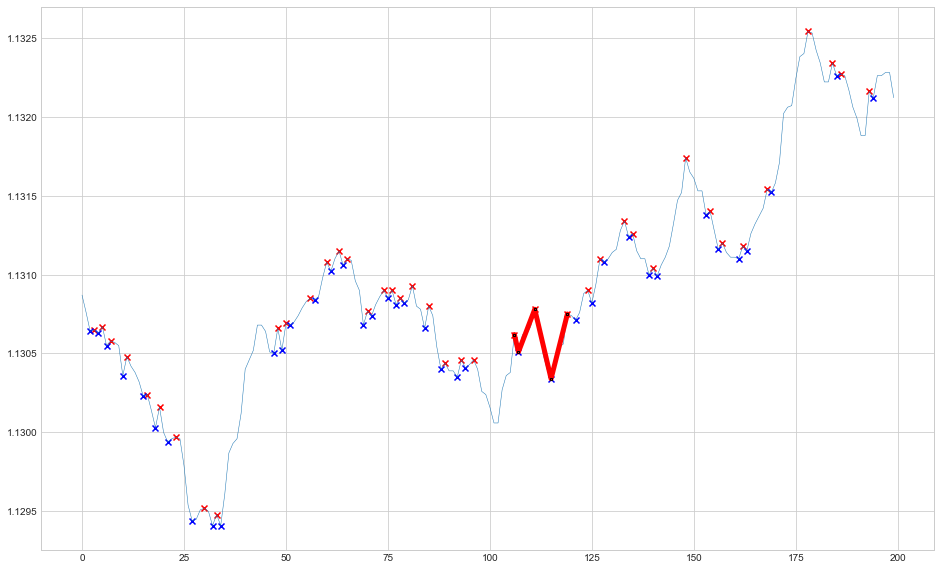

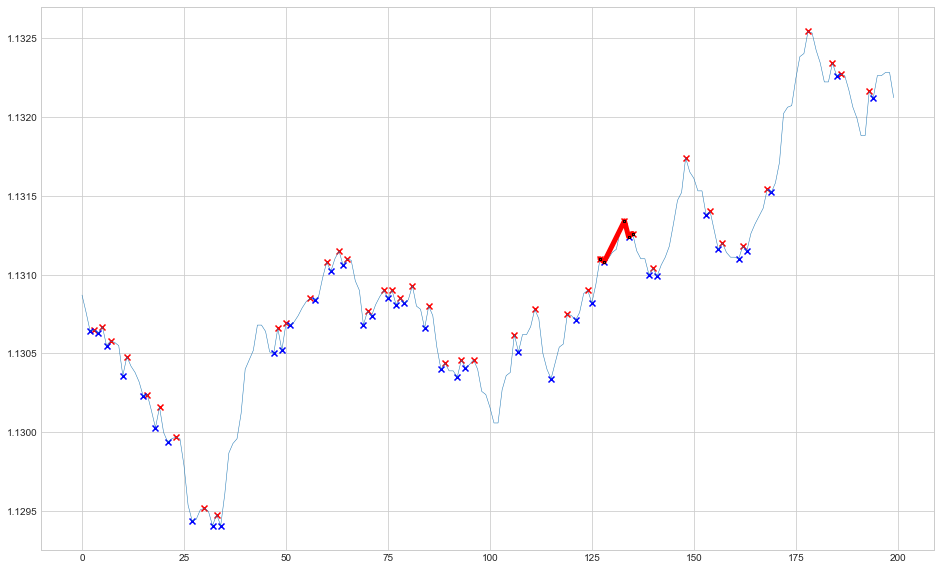

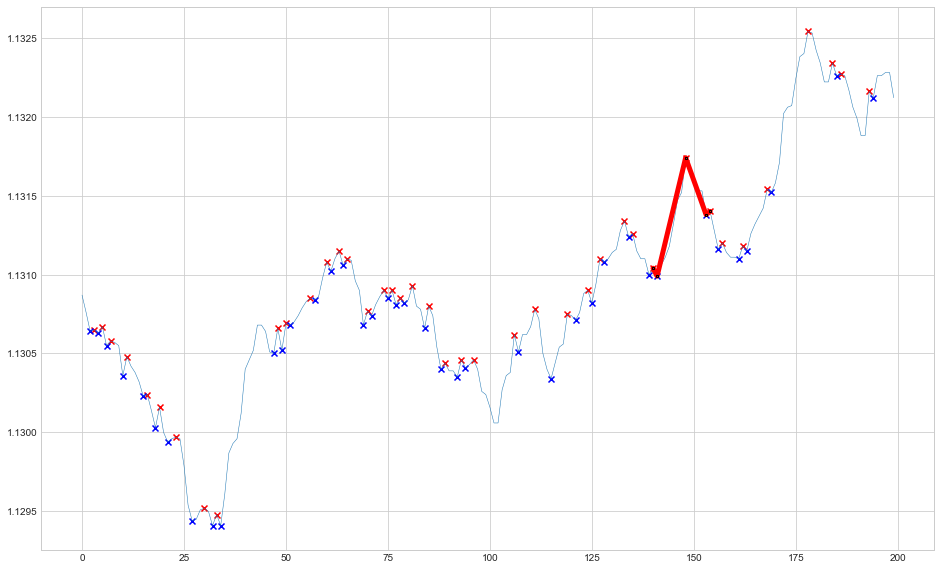

In [291]:
for p in patterns['HS']:
    df.C.plot(lw=.5, figsize=(16,10))
    plt.scatter(local_max, df.C.values[local_max], c='r', marker ='x');
    plt.scatter(local_min, df.C.values[local_min], c='b', marker = 'x');
    plt.plot(p.index, df.C.values[p.index], c='r', marker = 's',markersize=2, markeredgecolor='k',linewidth=5)
    plt.show()

In [ ]:
#  iterate over all min max points, 
and find windows where the points meet some pattern criteria

In [ ]:
from collections import defaultdict

def find_patterns(max_min):  
    patterns = defaultdict(list)
    
    # Window range is 5 units
    for i in range(5, len(max_min)):  
        window = max_min.iloc[i-5:i]
        
        # Pattern must play out in less than n units
        if window.index[-1] - window.index[0] > 100:      
            continue   
            
        a, b, c, d, e = window.iloc[0:5]
                
        # IHS
        if a<b and c<a and c<e and c<d and e<d and abs(b-d)<=np.mean([b,d])*0.02:
               patterns['IHS'].append((window.index[0], window.index[-1]))
        
    return patterns

patterns = find_patterns(minmax)
patterns

In [ ]:

for i in range(0, 9):
    df[f'mom_{i}']=np.sign(df.C.diff(i))
df['signal'] = df.apply(apply_sign, axis=1)
df.C.plot(drawstyle="steps", grid=True);
df.iloc[-5:,-12:]

In [ ]:
df.iloc[-1]

In [ ]:
df.iloc[-1:,-6:].T.plot(kind='bar')

In [ ]:
df.iloc[-7:,-5:].plot(subplots=True, drawstyle="steps", figsize=(5,10));

In [ ]:
print(account)

In [ ]:
%%time
resp = ctx.account.changes(defs.ACCOUNT_ID, sinceTransactionID=lti)
changes = resp.get('changes')
state = resp.get('state')
lti = resp.get('lastTransactionID')
print(lti)
print(changes.positions)
print('---')
for p in changes.trades:
    print(p)

In [ ]:
print(account)

In [ ]:
for p in account.positions:
    print(p)
    break

In [ ]:
def update_attribute(dest, name, value):
    if hasattr(dest, name) and getattr(dest, name) is not None:
        setattr(dest, name, value)

In [ ]:
def update_state_fields():
    for field in state.fields():
        update_attribute(account, field.name, field.value)

In [ ]:
def update_state_trades():
    

In [ ]:
print(changes)